In [1]:
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
#Lectura del xlsx
fname='Base Positivos - Corte 17 Abril v2.xlsx'
data_raw=pd.read_excel(fname, sheet_name=0)
data_raw.head()

,Fecha de diagnóstico,Fecha inicio sintomas,Ciudad,Código Comuna,Comuna,Código Barrio,Barrio,Código Zona,Grupo Edad,Sexo,Tipo de caso,Atención,Estado,Recuperado
0,2020-03-09,2020-02-28 00:00:00,Medellín,90,Corregimiento de Santa Elena,9001,Las Palmas,601,50 a 59 años,F,Importado,En casa,Leve,SI
1,2020-03-11,2020-03-03 00:00:00,Medellín,90,Corregimiento de Santa Elena,9001,Las Palmas,601,20 a 29 años,M,Relacionado con la importación,En casa,Leve,SI
2,2020-03-11,2020-03-05 00:00:00,Medellín,90,Corregimiento de Santa Elena,9001,Las Palmas,601,50 a 59 años,M,Relacionado con la importación,En casa,Leve,SI
3,2020-03-14,2020-03-09 00:00:00,Medellín,14,El Poblado,1416,Alejandría,241,20 a 29 años,F,Relacionado con la importación,En casa,Leve,SI
4,2020-03-14,2020-03-10 00:00:00,Medellín,11,Laureles Estadio,1108,Laureles,198,20 a 29 años,M,Relacionado con la importación,En casa,Leve,SI


In [3]:
#Filtro para las variables que usaremos, solo se tomarán los casos donde recuperado sea sí, porque son los que ya han terminado
data=data_raw[['Barrio','Sexo','Grupo Edad', 'Estado', 'Recuperado']]
data=data[data['Recuperado']=='SI']
del data['Recuperado']
data.head()

,Barrio,Sexo,Grupo Edad,Estado
0,Las Palmas,F,50 a 59 años,Leve
1,Las Palmas,M,20 a 29 años,Leve
2,Las Palmas,M,50 a 59 años,Leve
3,Alejandría,F,20 a 29 años,Leve
4,Laureles,M,20 a 29 años,Leve


In [4]:
#Creamos los conjuntos de datos
X=data[['Barrio','Sexo','Grupo Edad']]
y=data['Estado']
y=y.apply(lambda x: 'leve' if x == 'Leve' else 'no leve')
y.head()

0    leve
1    leve
2    leve
3    leve
4    leve
Name: Estado, dtype: object

In [5]:
#División en conjuntos de entrenamiento y validación
lesex=LabelEncoder()
lebarr=LabelEncoder()
lege=LabelEncoder()
X['Sexo']=lesex.fit_transform(X['Sexo'])
X['Barrio']=lebarr.fit_transform(X['Barrio'])
X['Grupo Edad']=lege.fit_transform(X['Grupo Edad'])
X_train, X_val, y_train, y_val = train_test_split(
    X , y, test_size=0.2, random_state=105)

C:\Users\Juanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Juanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Juanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [6]:
#Creación y entrenamiento de los clasificadores
tree_depth=3
crit='entropy'
cl=tree.DecisionTreeClassifier(random_state = 2204, criterion = crit, max_depth = tree_depth)
cl.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2204, splitter='best')

In [7]:
#Obtención de las métricas
preds=cl.predict(X_val)
print(classification_report(y_true=y_val,y_pred=preds))

              precision    recall  f1-score   support

        leve       0.85      1.00      0.92        17
     no leve       0.00      0.00      0.00         3

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20



C:\Users\Juanj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
#Matrices de confusión
print('Matriz de confusión del árbol:\n',confusion_matrix(y_true=y_val,y_pred=preds))

Matriz de confusión del árbol:
 [[17  0]
 [ 3  0]]


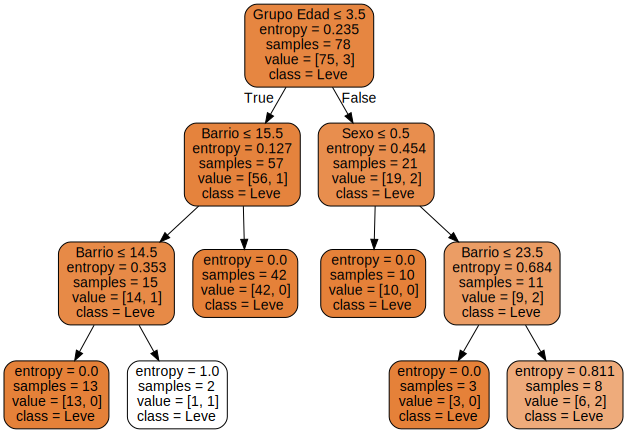

In [9]:
#Graficación del primer árbol
data_graph=tree.export_graphviz(cl, out_file=None, feature_names=['Barrio','Sexo', 'Grupo Edad'],
                                   class_names=['Leve', 'No leve'],
                                   filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(data_graph, format='png')
graph


In [10]:
graph.render('Árbol datos alcaldía')

'Árbol datos alcaldía.png'